In [197]:
import os
import tarfile
import urllib.request

#verileri getirmek için ..
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [198]:
fetch_housing_data()

In [199]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path) #dosyayı okuyup fonksiyona geri döndürüyor.

In [200]:
housing = load_housing_data() #fonksiyonu çağırıp dosyayı değişkene attık
housing.head() #head metoduyla veri setimizin ilk 5 kaydına bakıyoruz.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [201]:
housing.info() #verilerin özelliklerini, sütun ve sayısı, boş olup olmadığını, veri tiplerini,
#ne kadar hafıza kullandığını gösterir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [202]:
housing["ocean_proximity"].value_counts() #function returns object containing counts of unique values. 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [203]:
housing.describe() #Hem sayısal hem de nesne serilerini ve ayrıca karışık veri türlerinin DataFrame sütun kümelerini analiz eder.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


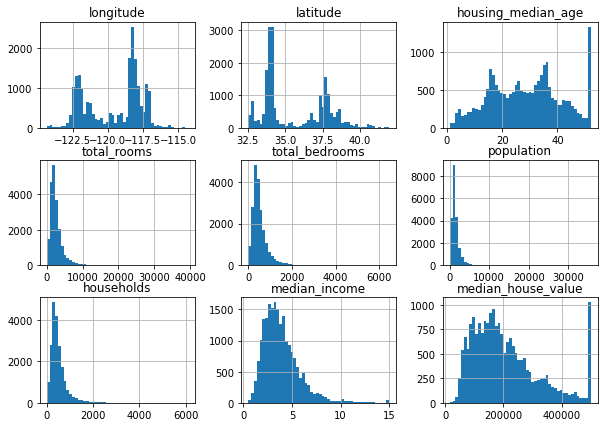

In [204]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10,7))
plt.show()

In [205]:
#çıktıyı her çalıştırmada aynı yapmak için bunu kullanabileceğimizden bahsediyor
np.random.seed(42)

In [206]:
import numpy as np
#Test set oluşturma aşaması
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
#iloc komutunda satır index etiketi değilde satırların index numaralarını kullanmaktayız.

In [207]:
#Gelen değerleri görmek ve daha iyi anlamak için değerleri denedim.
print(len(housing)) #verinin uzunluğu
print(np.random.permutation(len(housing)))
print(int(len(housing) * 0.2)) #3302
print(np.random.permutation(len(housing))[:int(len(housing) * 0.2)]) #13210
print(np.random.permutation(len(housing))[int(len(housing) * 0.2):]) #3302
print(housing.iloc[np.random.permutation(len(housing))[int(len(housing) * 0.2)]:]) 
print(housing.iloc[np.random.permutation(len(housing))[:int(len(housing) * 0.2)]]) 

20640
[20046  3024 15663 ...  5390   860 15795]
4128
[20512 15568  4047 ...  3076 10738  9836]
[ 7211 13106  4781 ...  6081  6022  6612]
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15007    -117.02     32.76                15.0       1204.0           326.0   
15008    -117.02     32.76                40.0       2523.0           488.0   
15009    -117.02     32.75                33.0       3296.0           537.0   
15010    -117.03     32.75                24.0       7879.0          1655.0   
15011    -117.04     32.77                26.0       4263.0          1037.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409

In [208]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [209]:
import hashlib
#Test seti, yeni örneklerin %20'sini içerecek, ancak daha önce eğitim setinde bulunan hiçbir örneği içermeyecek
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [210]:
#housing veri kümesinde dentifier column olmadığı için satır indexini kullanıyoruz.
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [211]:
#fakat herhangi bir satır silinirse indexlerimiz değişebilir, bunun olmaması için veri setinde değişmeyecek featurları 
# baz almamız gerekiyor bu bizim için bu enlem ve boylam oluyor. 
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [212]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) #sklearn train_test_split kullanarak 
#hazır bir fonksiyonlar verimizi train ve test olarak ayırabiliriz.

In [213]:
test_set.head() #head metoduyla test setimizin ilk 5 kaydına bakıyoruz.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [214]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) 
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

<AxesSubplot:>

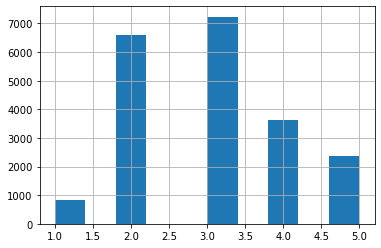

In [215]:
housing["income_cat"].hist()

In [216]:
from sklearn.model_selection import StratifiedShuffleSplit
#gelir kategorisine göre tabakalı örnekleme
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [217]:
housing["income_cat"].value_counts() / len(housing)
#Tüm housing veri setindeki gelir kategorisi oranları

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [218]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props
#Sampling bias ile random sampling'in karşılaştırılması

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [219]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

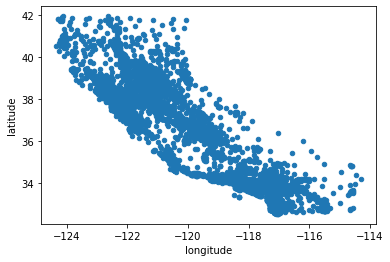

In [220]:
housing.plot(kind="scatter", x="longitude", y="latitude")
#Coğrafi bilgi (enlem ve boylam) olduğundan, verileri görselleştirmek için tüm ilçelerin dağılım grafiğini oluşturduk.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

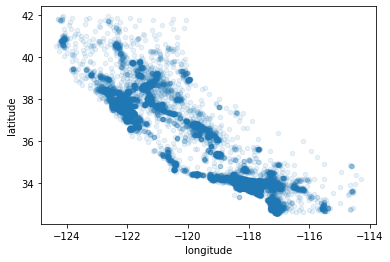

In [221]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
#Alfa seçeneğini 0,1 olarak ayarlayarak, yüksek yoğunluklu veri noktalarının olduğu yerleri görselleştirdik.

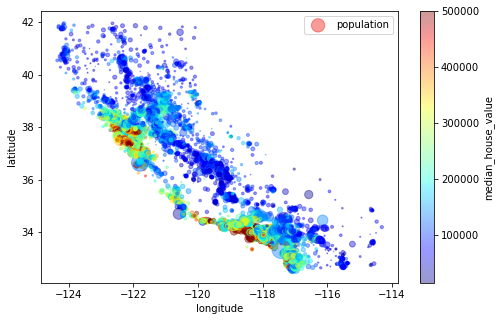

In [222]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(8,5),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
#renk haritası kullanarak housing price.Maviden düşük fiyatlar kırmızı (yüksek fiyatlar.

In [224]:
corr_matrix = housing.corr()

In [225]:
corr_matrix["median_house_value"].sort_values(ascending=False)
#corr() yöntemini kullanarak her özellik çifti arasındaki standart korelasyon katsayısını hesapladık.

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

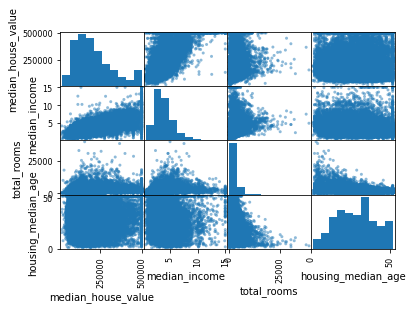

In [85]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(6, 4))

#Nitelikler arasındaki korelasyonu kontrol etmenin bir başka yolu olan, her sayısal özelliği diğer her sayısal 
#özelliğe karşı çizen Pandas'ın scatter_matrix işlevini kullandık.

(0.0, 16.0, 0.0, 550000.0)

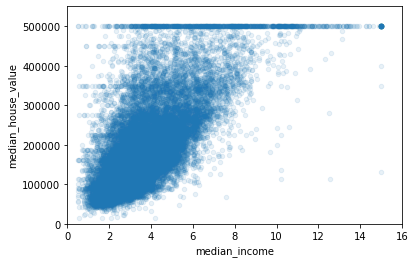

In [86]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
#medyan geliri korelasyon dağılım grafiği.

In [87]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
#çeşitli öznitelik kombinasyonlarını denemek amacıyla hane başına nüfusa da bakıyoruz.

In [88]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [ ]:
#median_house_value özniteliği, median house değeriyle toplam oda veya yatak odası sayısından çok daha fazla ilişkilidir. 
#daha düşük yatak odası/oda oranına sahip evler daha pahalı olma eğiliminde. 
#Hane başına düşen oda sayısı, bir bölgedeki toplam 
#oda sayısından daha bilgilendirici. Ve evler ne kadar büyükse, o kadar pahalı.

In [89]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy() #verilerdeki değişiklikten etkilenmeyecek

In [ ]:
#Total_bedrooms özelliğinin bazı eksik değerlerini düzelteceğiz. Bunun için 3 seçenek var.

In [90]:
housing.dropna(subset=["total_bedrooms"])    # option 1 ilgili ilçelerden kurtulmak.
housing.drop("total_bedrooms", axis=1)       # option 2 tüm attribute'lardan kurtulmak.
median = housing["total_bedrooms"].median()  # option 3 değerleri bir değere ayarlamak.
housing["total_bedrooms"].fillna(median, inplace=True)

In [91]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [92]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [93]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [94]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [95]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [96]:
X = imputer.transform(housing_num)

In [97]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing.index)

In [98]:
housing_tr.head()#head metoduyla ilk 5 kayda bakıyoruz.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [99]:
housing_cat = housing[["ocean_proximity"]]
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded
#ocean_proximity metin etiketlerini sayılara dönüştürdük.

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [100]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [101]:
from sklearn.preprocessing import OneHotEncoder
#ML algoritmalarının iki yakın değerin iki uzak değerden daha benzer olduğunu 
#varsaydığı için bunu çözmek için onehotencoder kullanıyoruz.
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
#fit_transform() öğesinin bir 2B dizi bekler, fakat housing_cat_encoded bir 1B dizidir. 
#Bu yüzden tekrar şekillendirmemiz gerekecek.

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [102]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [103]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin
#birleşik öznitelikleri ekleyen bir transformatör sınıfı.
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
#fit() komutunu çağırdığımızda o da fit_transform()'u çağırır. 
#her bir çağrının çıktısını bir sonraki çağrıya parametre olarak iletir, son estimator'a ulaşana kadar,
#kendisi için sadece fit()'i çağırır.
#Pipeline, son esimator'e kadar aynı yöntemleri gösterir. 
#Bu örnekte, son esimator, bir transformatör olan bir StandardScaler'dır.

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin

class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
#istenen öznitelikleri seçerek, kalanları bırakarak ve elde edilen 
#DataFrame'i bir NumPy dizisine dönüştürerek verileri dönüştürecektir.
    
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])


In [122]:
from sklearn.pipeline import FeatureUnion
#iki pipeline'ı tek bir pipeline yapmak için FeatureUnion kullanırız.
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [123]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [124]:
housing_prepared.shape

(16512, 16)

In [125]:
from sklearn.linear_model import LinearRegression
#linear regression modeli eğitiyoruz.
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [126]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [127]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [128]:
#mean_squared_error 
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
#Bu, eğitim verilerine yetersiz uyan bir model örneğidir. #underfitting

68628.19819848923

In [129]:
# Underfitting'i çözmek için. Bir DecisionTreeRegressor eğiteceğiz. 
#DecisionTreeRegressor verilerde karmaşık doğrusal olmayan ilişkileri bulabilen güçlü bir modeldir.
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
#hiç hata olmadığını görüyoruz. Overfit oldu emin olmak için,
#training setin bir kısmını validation set olarak ayıracağız.

In [130]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10) 
tree_rmse_scores = np.sqrt(-scores)

#Scikit-Learn’s cross-validation feature'ı ile eğitim verisini folds adı verilen 10 ayrı alt kümeye rastgele bölüp
#Decision Tree'yi 10 kez eğitir ve değerlendirir.

In [131]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)
#Sonuç, 10 değerlendirme puanını içeren bir dizidir:

Scores: [68488.3370935  65042.79781143 70175.26373137 69258.45764832
 71208.96084217 75556.1874714  68351.08305101 71050.96967834
 77137.63763926 69758.16905315]
Mean: 70602.78640199584
Standard deviation: 3331.166303753608


In [132]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798348


In [ ]:
#Karar Ağacı modeli o kadar fazla uyuyor ki(overfitting).Doğrusal Regresyon modelinden daha kötü performans gösteriyor. 
#Şimdi son bir modeli deneyelim: RandomForestRegressor.

In [143]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

#birçok Decision Tree özelliklerin rastgele alt kümeleri üzerinde eğiterek ve ardından onların 
#tahminlerinin ortalamasını alarak çalışır.


RandomForestRegressor(random_state=42)

In [144]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [145]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


In [ ]:
#Random Forests look very promising. 
#However, note that the score on the training set is still much lower than on the validation sets, 
#meaning that the model is still overfitting the training set. 

In [148]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [149]:
my_model = full_pipeline_with_predictor

In [150]:
import joblib
joblib.dump(my_model, "my_model.pkl") 
my_model_loaded = joblib.load("my_model.pkl") 

In [147]:
#RandomForestRegressor için en iyi hiperparametre değerleri kombinasyonunu arar:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [151]:
grid_search.best_params_
#en iyi parametre kombinasyonu:

{'max_features': 6, 'n_estimators': 30}

In [152]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [153]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params)
#evaluation scores:

63504.889180790306 {'max_features': 2, 'n_estimators': 3}
55973.10787295627 {'max_features': 2, 'n_estimators': 10}
52822.08747593742 {'max_features': 2, 'n_estimators': 30}
60367.23923782609 {'max_features': 4, 'n_estimators': 3}
52548.19435575292 {'max_features': 4, 'n_estimators': 10}
50680.739581897506 {'max_features': 4, 'n_estimators': 30}
59326.46160133487 {'max_features': 6, 'n_estimators': 3}
51710.45766208597 {'max_features': 6, 'n_estimators': 10}
50014.73819098108 {'max_features': 6, 'n_estimators': 30}
58711.4492669283 {'max_features': 8, 'n_estimators': 3}
52269.63946564946 {'max_features': 8, 'n_estimators': 10}
50057.72705272367 {'max_features': 8, 'n_estimators': 30}
61514.03662374151 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54687.962941909354 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60317.434778551265 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52721.311546553596 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [154]:
#RandomForestRegressor, doğru tahminler yapmak için her bir özniteliğin göreli önemini gösterebilir:
feature_importances = grid_search.best_estimator_.feature_importances_ 
feature_importances

array([7.36322706e-02, 7.43219389e-02, 4.45825018e-02, 1.82863356e-02,
       1.63033648e-02, 1.82794313e-02, 1.58386813e-02, 3.10409807e-01,
       6.14707229e-02, 1.07193821e-01, 8.53471879e-02, 1.22738034e-02,
       1.55694935e-01, 6.36719382e-05, 3.36242837e-03, 2.93909811e-03])

In [157]:
#Bu önem scorelarına karşılık gelen öznitelik adlarının yanında gösterelim:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31040980713001737, 'median_income'),
 (0.15569493467694137, 'INLAND'),
 (0.10719382125425819, 'pop_per_hhold'),
 (0.08534718792154508, 'bedrooms_per_room'),
 (0.07432193893287495, 'latitude'),
 (0.07363227060263251, 'longitude'),
 (0.061470722931676026, 'rooms_per_hhold'),
 (0.04458250177354083, 'housing_median_age'),
 (0.01828633562610556, 'total_rooms'),
 (0.018279431266254118, 'population'),
 (0.01630336475379023, 'total_bedrooms'),
 (0.015838681281632357, 'households'),
 (0.01227380343550092, '<1H OCEAN'),
 (0.0033624283673382256, 'NEAR BAY'),
 (0.0029390981077213095, 'NEAR OCEAN'),
 (6.367193817101739e-05, 'ISLAND')]

In [158]:
#NİHAYEEET!!! final modelimizi test setinde deneyelim:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse